In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score

# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import acquire as acq
import prepare as prep
from prepare import *

In [3]:
total_df = prep.prep_telco(acq.get_telco_data())

In [4]:
df_monkey = total_df[['contract_type', 'contract_type_id']]
df_monkey.sample(10)

,contract_type,contract_type_id
7000,Two year,3
749,Month-to-month,1
1885,Two year,3
2429,Month-to-month,1
3241,Month-to-month,1
7004,Two year,3
1438,One year,2
383,Month-to-month,1
6287,One year,2
1288,One year,2


In [5]:
look = acq.peekatdata(total_df)
look

HEAD:
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 1  0003-MKNFE   
1                4                         1                 1  0013-MHZWF   
2                1                         1                 1  0015-UOCOJ   
3                1                         1                 1  0023-HGHWL   
4                3                         1                 1  0032-PGELS   

   gender  senior_citizen partner dependents  tenure phone_service  \
0    Male               0      No         No       9           Yes   
1  Female               0      No        Yes       9           Yes   
2  Female               1      No         No       7           Yes   
3    Male               1      No         No       1            No   
4  Female               0     Yes        Yes       1            No   

             ...            tv_encode streaming_services  \
0            ...                    0       

In [6]:
#acq.peekatdata(df)
#df.head()

In [7]:
total_df.shape

(7032, 38)

In [8]:
total_df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'tenure_yearly', 'churn_encode', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode'],
      dtype='object')

In [9]:
df = total_df

In [10]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- payment_type_id ---
1    2365
2    1604
3    1542
4    1521
Name: payment_type_id, dtype: int64
---- internet_service_type_id ---
2    3096
1    2416
0    1520
Name: internet_service_type_id, dtype: int64
---- contract_type_id ---
1    3875
3    1685
2    1472
Name: contract_type_id, dtype: int64
---- customer_id ---
4958-XCBDQ    1
4683-WYDOU    1
0754-UKWQP    1
5482-VXSXJ    1
2351-RRBUE    1
0520-FDVVT    1
8111-BKVDS    1
8917-SZTTJ    1
4742-TXUEX    1
1731-TVIUK    1
2667-WYLWJ    1
6077-BDPXA    1
5049-GLYVG    1
1173-XZPYF    1
8992-VONJD    1
5201-FRKKS    1
5956-VKDTT    1
2234-EOFPT    1
1335-MXCSE    1
0815-MFZGM    1
8313-KTIHG    1
9529-OFXHY    1
2582-FFFZR    1
4549-ZDQYY    1
2469-DTSGX    1
4021-RQSNY    1
8039-ACLPL    1
9796-MVYXX    1
3181-VTHOE    1
7878-RTCZG    1
             ..
2982-IHMFT    1
5655-JSMZM    1
0880-FVFWF    1
9572-WUKSB    1
6953-PBDIN    1
1839-FBNFR    1
9026-RNUJS    1
2303-PJYHN    1
0374-IOEGQ    1
2364-UFROM    1
0716-BQNDX    1
0442

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 38 columns):
payment_type_id             7032 non-null int64
internet_service_type_id    7032 non-null int64
contract_type_id            7032 non-null int64
customer_id                 7032 non-null object
gender                      7032 non-null object
senior_citizen              7032 non-null int64
partner                     7032 non-null object
dependents                  7032 non-null object
tenure                      7032 non-null int64
phone_service               7032 non-null object
multiple_lines              7032 non-null object
online_security             7032 non-null object
online_backup               7032 non-null object
device_protection           7032 non-null object
tech_support                7032 non-null object
streaming_tv                7032 non-null object
streaming_movies            7032 non-null object
paperless_billing           7032 non-null object
monthly_charges 

In [12]:
df_just_nums = df[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode', 'churn_encode']]
# 'customer_id', 

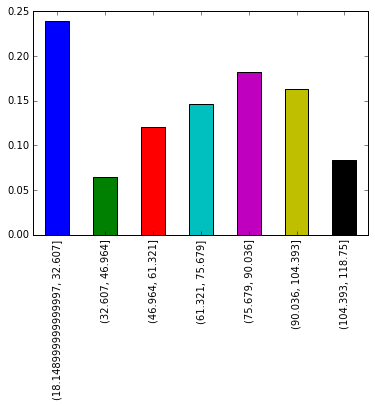

In [13]:
df_just_nums.monthly_charges.value_counts(normalize=True, sort=False, bins=7).plot.bar()

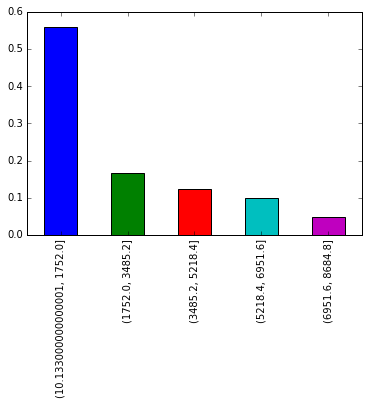

In [14]:
df_just_nums.total_charges.value_counts(normalize=True, sort=False, bins=5).plot.bar()

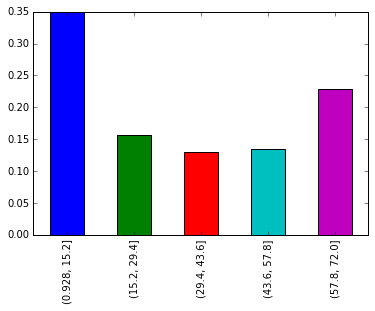

In [15]:
df_just_nums.tenure.value_counts(normalize=True, sort=False, bins=5).plot.bar()

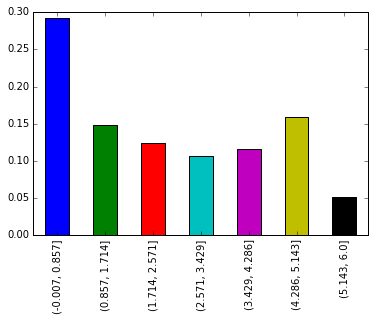

In [16]:
df_just_nums.tenure_yearly.value_counts(normalize=True, sort=False, bins=7).plot.bar()

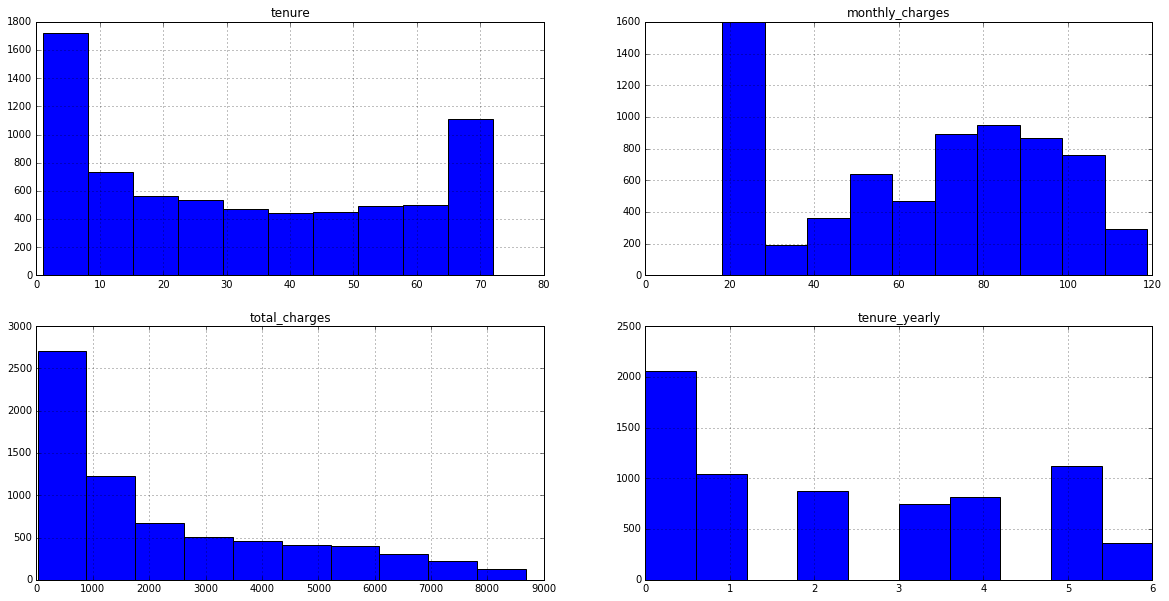

In [17]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = df_just_nums[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=False)

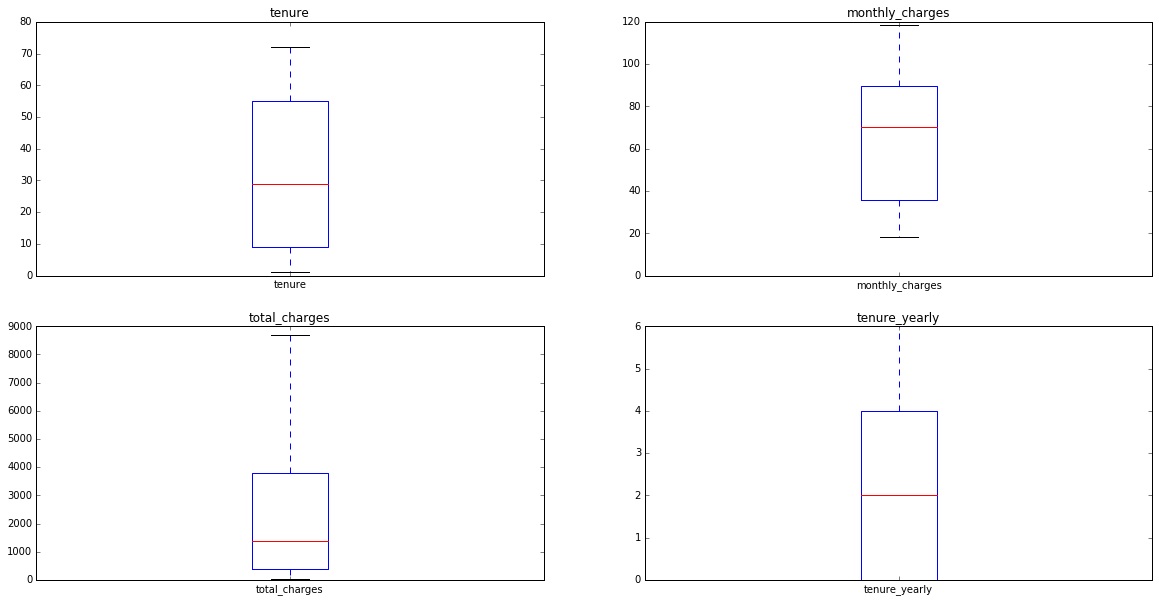

In [18]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = df_just_nums[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.plot.box()#logy=True)

## Split into X's, y's and Train/Tests

In [19]:
X = df_just_nums.drop(['churn_encode'], axis=1)
y = df_just_nums[['churn_encode']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 123)

In [20]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode', 'streaming_services', 'online_security_encode', 'online_backup_encode', 'online_security_backup', 'household_type_id', 'gender_encode', 'paperless_billing_encode', 'tech_support_encode', 'device_protection_encode', 'churn_encode']
Train dimensions (rows, columns): (4922, 21)


Test columns:  ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode', 'streaming_services', 'online_security_encode', 'online_backup_encode', 'online_security_backup', 'household_type_id', 'gender_encode', 'paperless_billing_encode', 'tech_support_encode', 'device_protection_encode', 'churn_encode']
Test dimensions (rows, columns): (2110, 21)


In [21]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.70
Test Split: 0.30


In [55]:
train, test = scale_split_data(train, test)

In [23]:
train.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode',
       'streaming_services', 'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode', 'churn_encode', 'monthly_charges_scaled',
       'total_charges_scaled'],
      dtype='object')

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


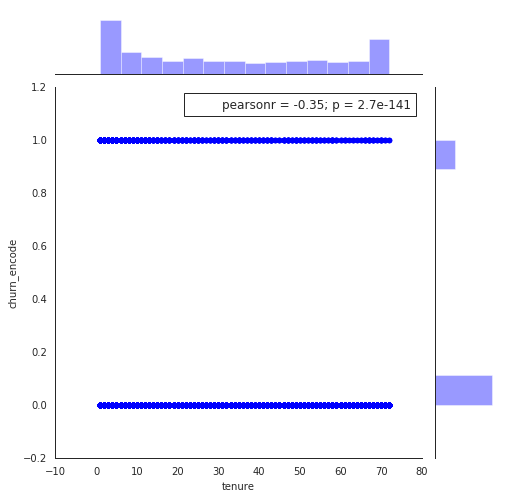

In [24]:
with sns.axes_style('white'):
    j = sns.jointplot('tenure', 'churn_encode', data=train, kind='scatter', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

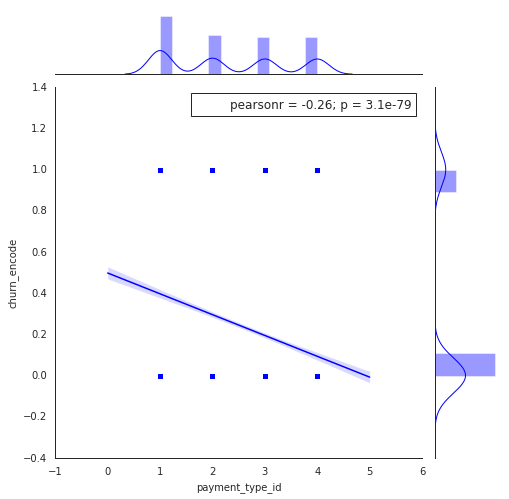

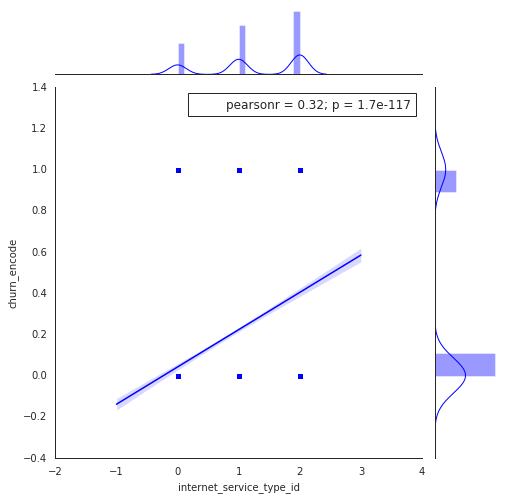

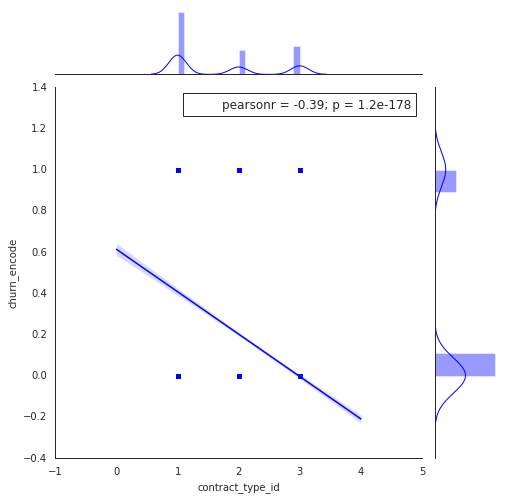

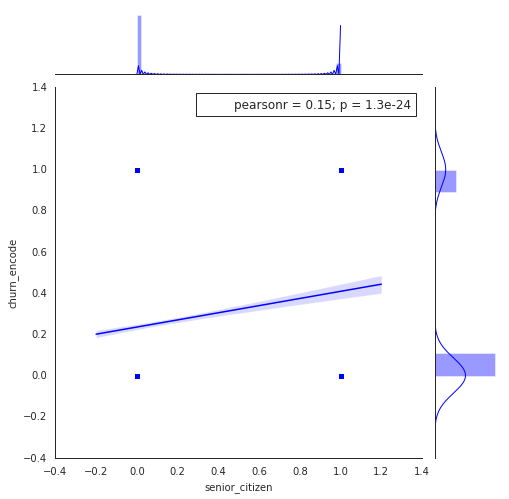

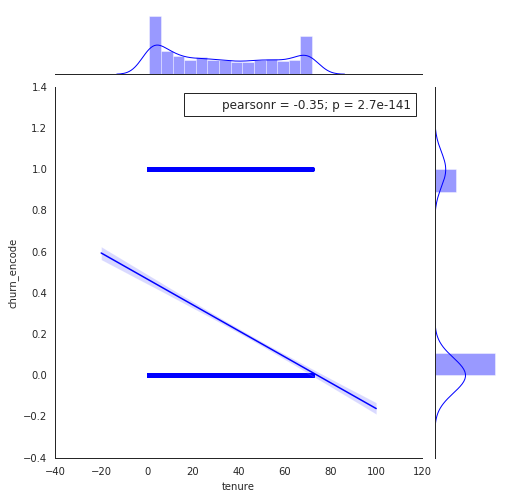

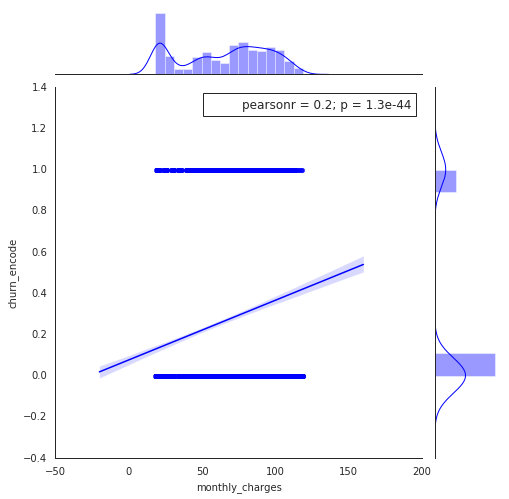

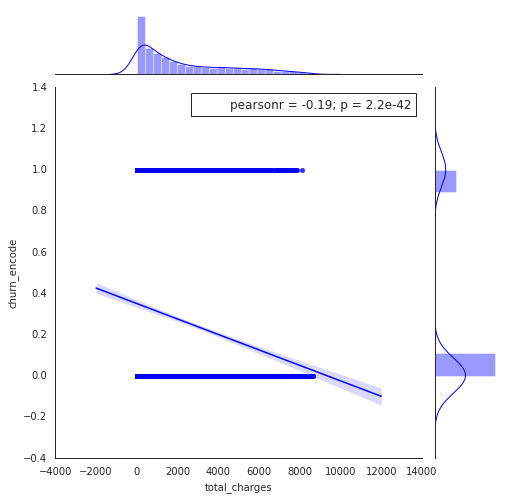

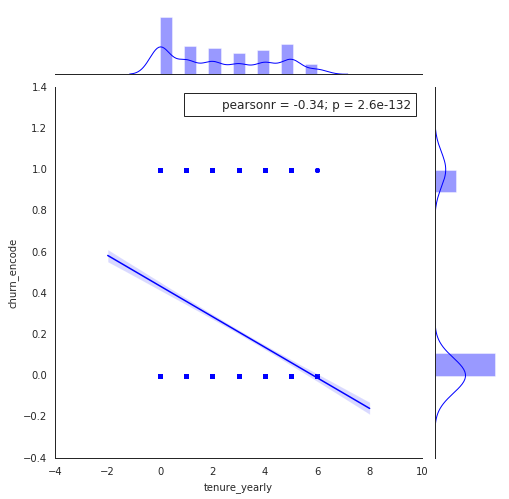

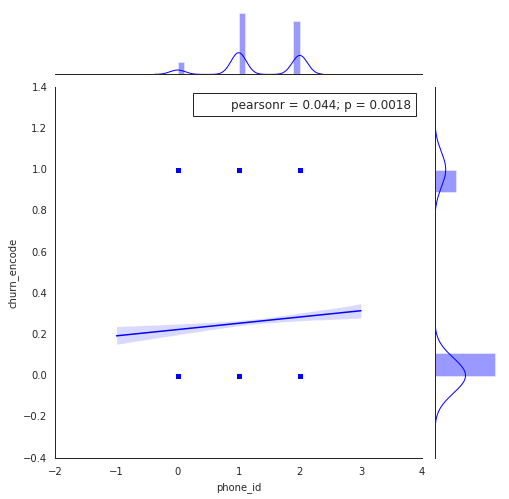

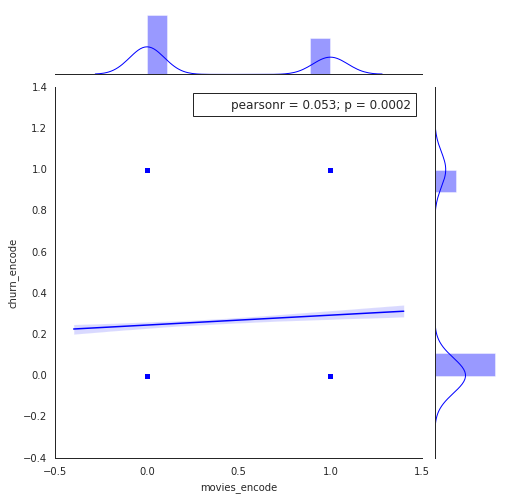

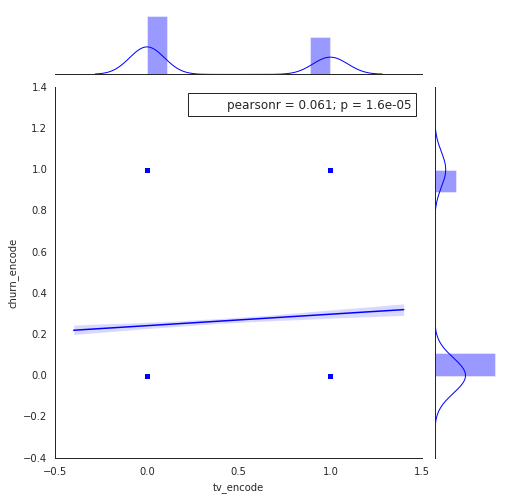

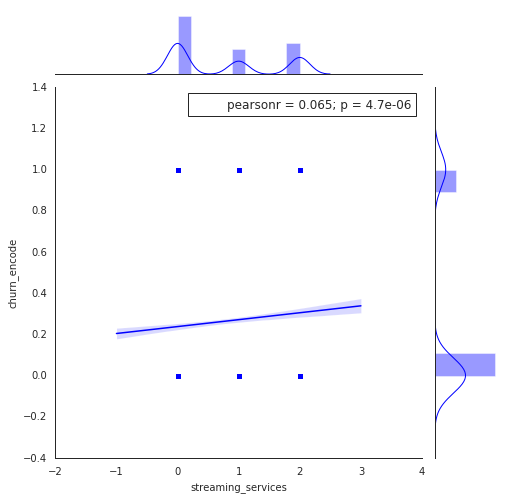

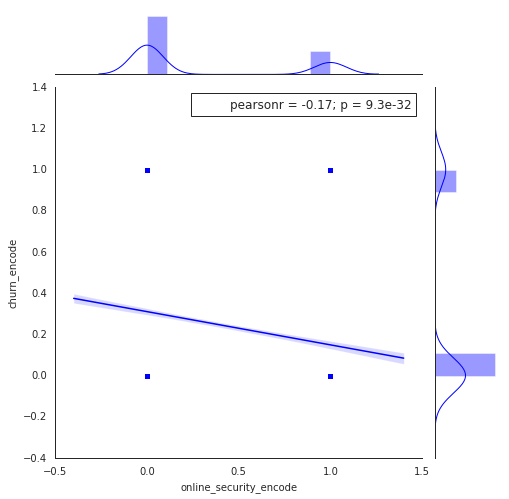

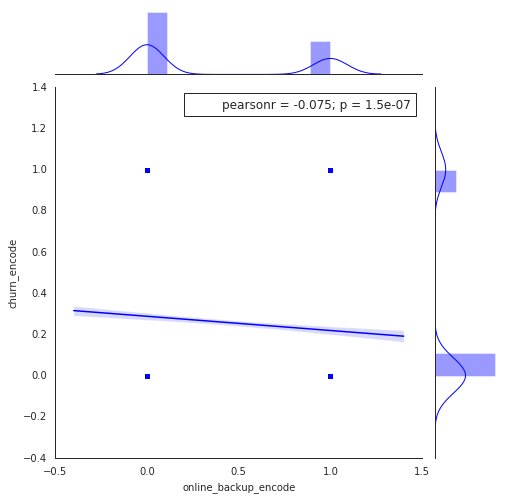

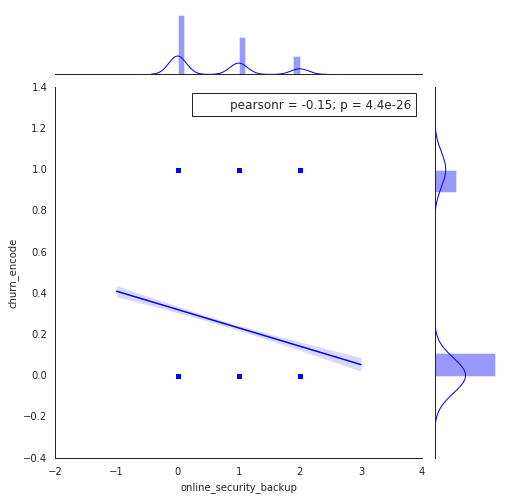

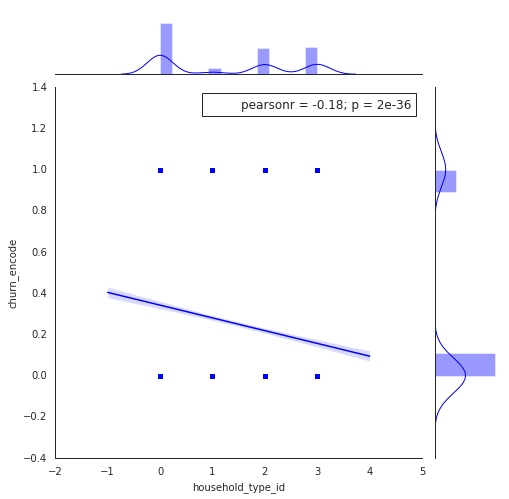

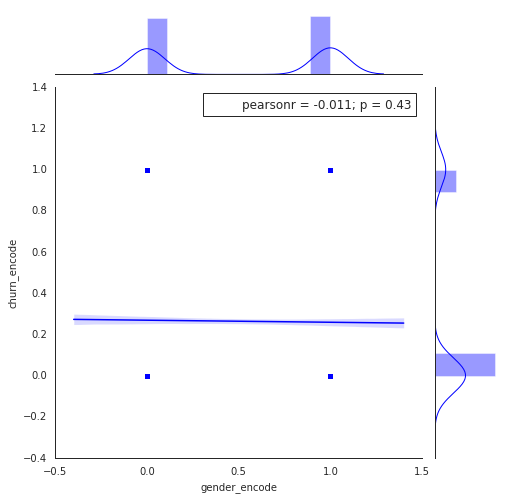

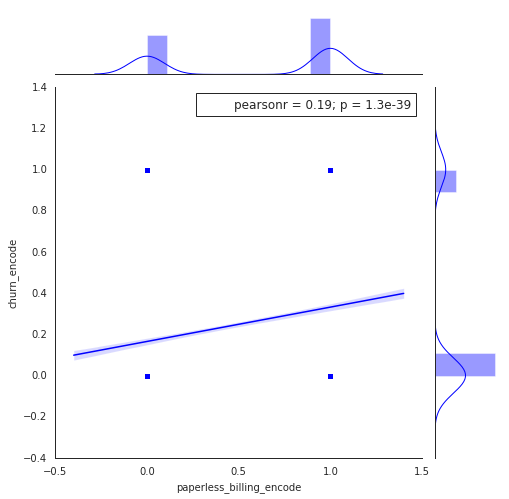

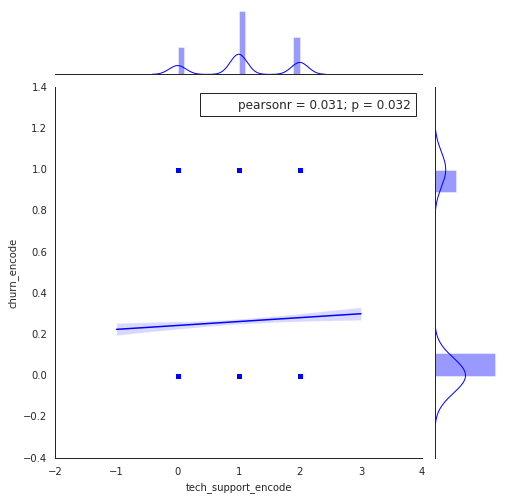

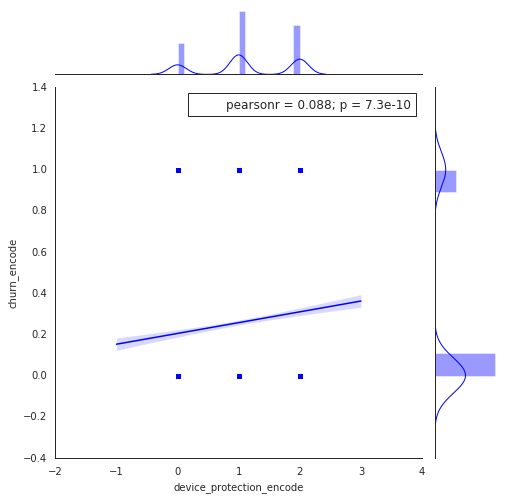

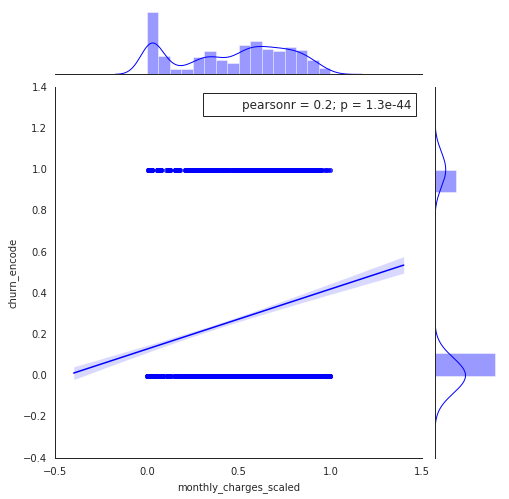

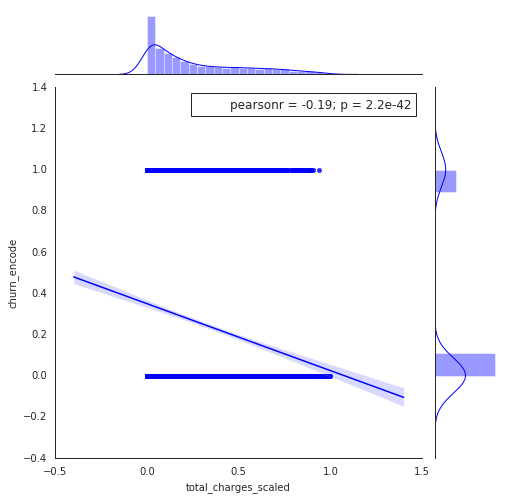

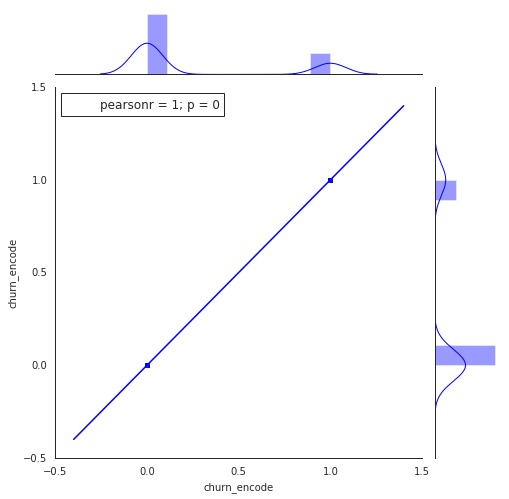

In [25]:
for i, col in enumerate(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode',  'monthly_charges_scaled',
       'total_charges_scaled', 'churn_encode']):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'churn_encode', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

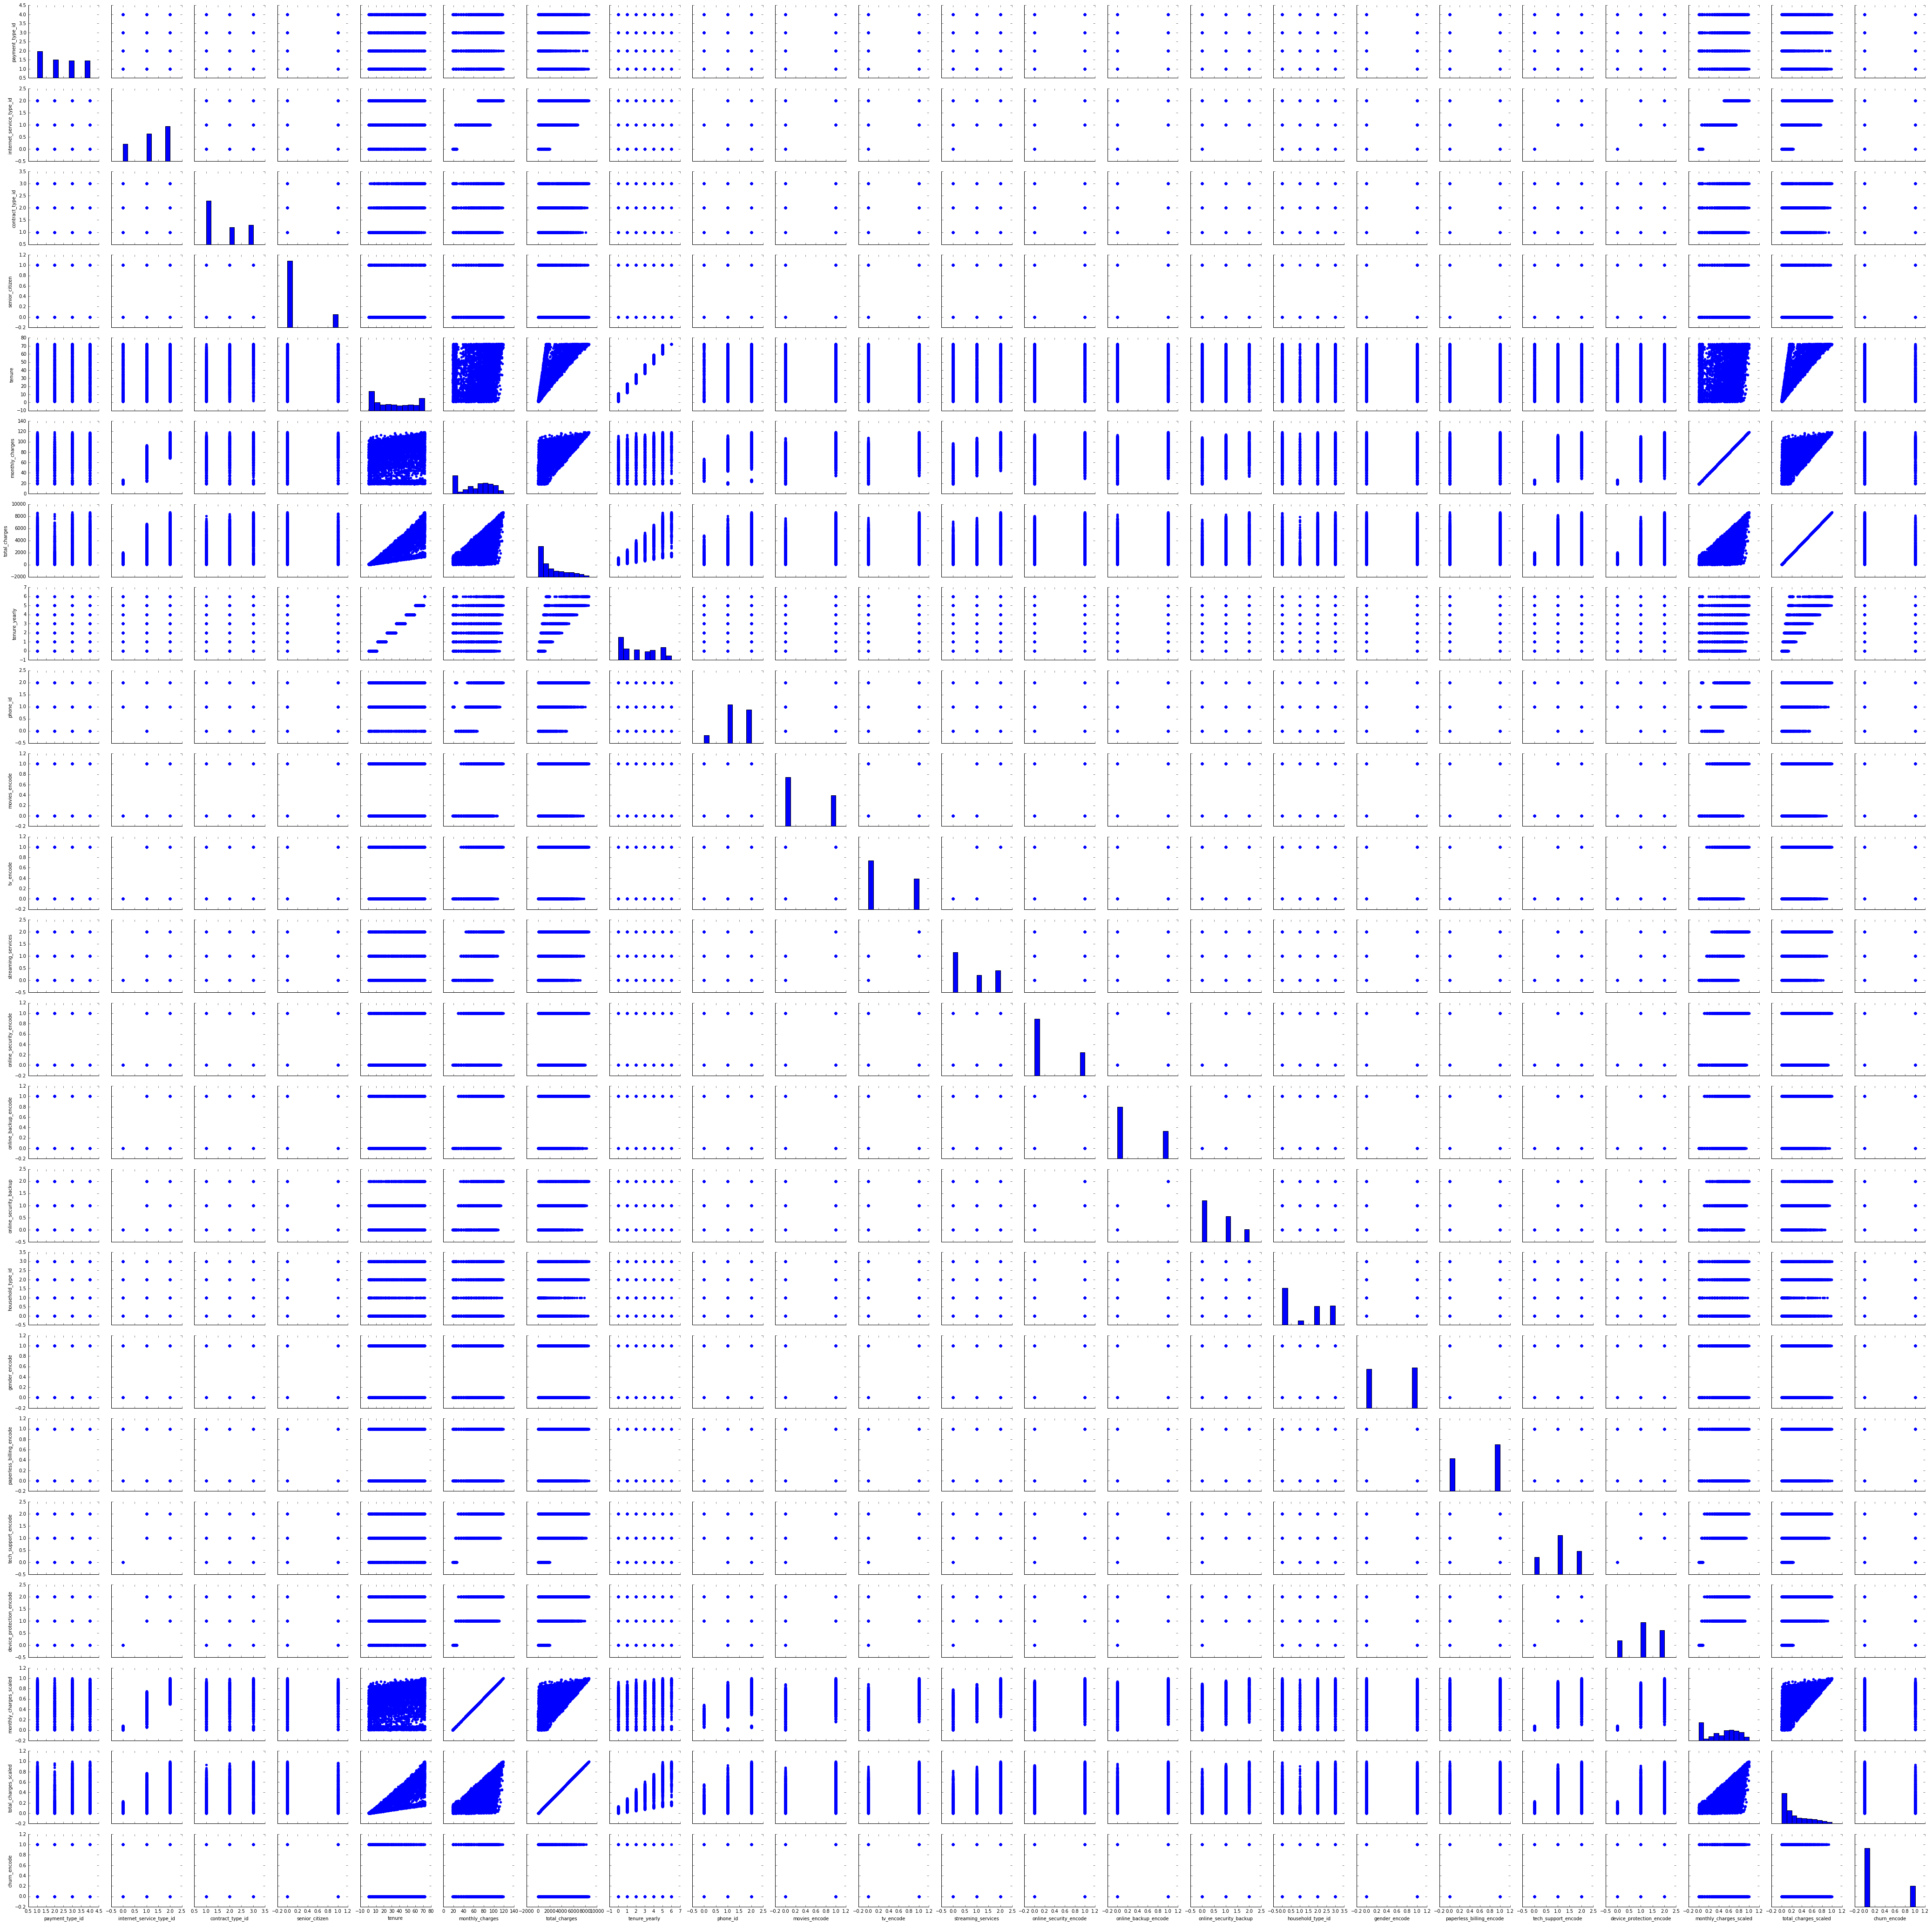

In [26]:
g = sns.PairGrid(train[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly', 'phone_id',
       'movies_encode', 'tv_encode', 'streaming_services',
       'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode',  'monthly_charges_scaled',
       'total_charges_scaled', 'churn_encode']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

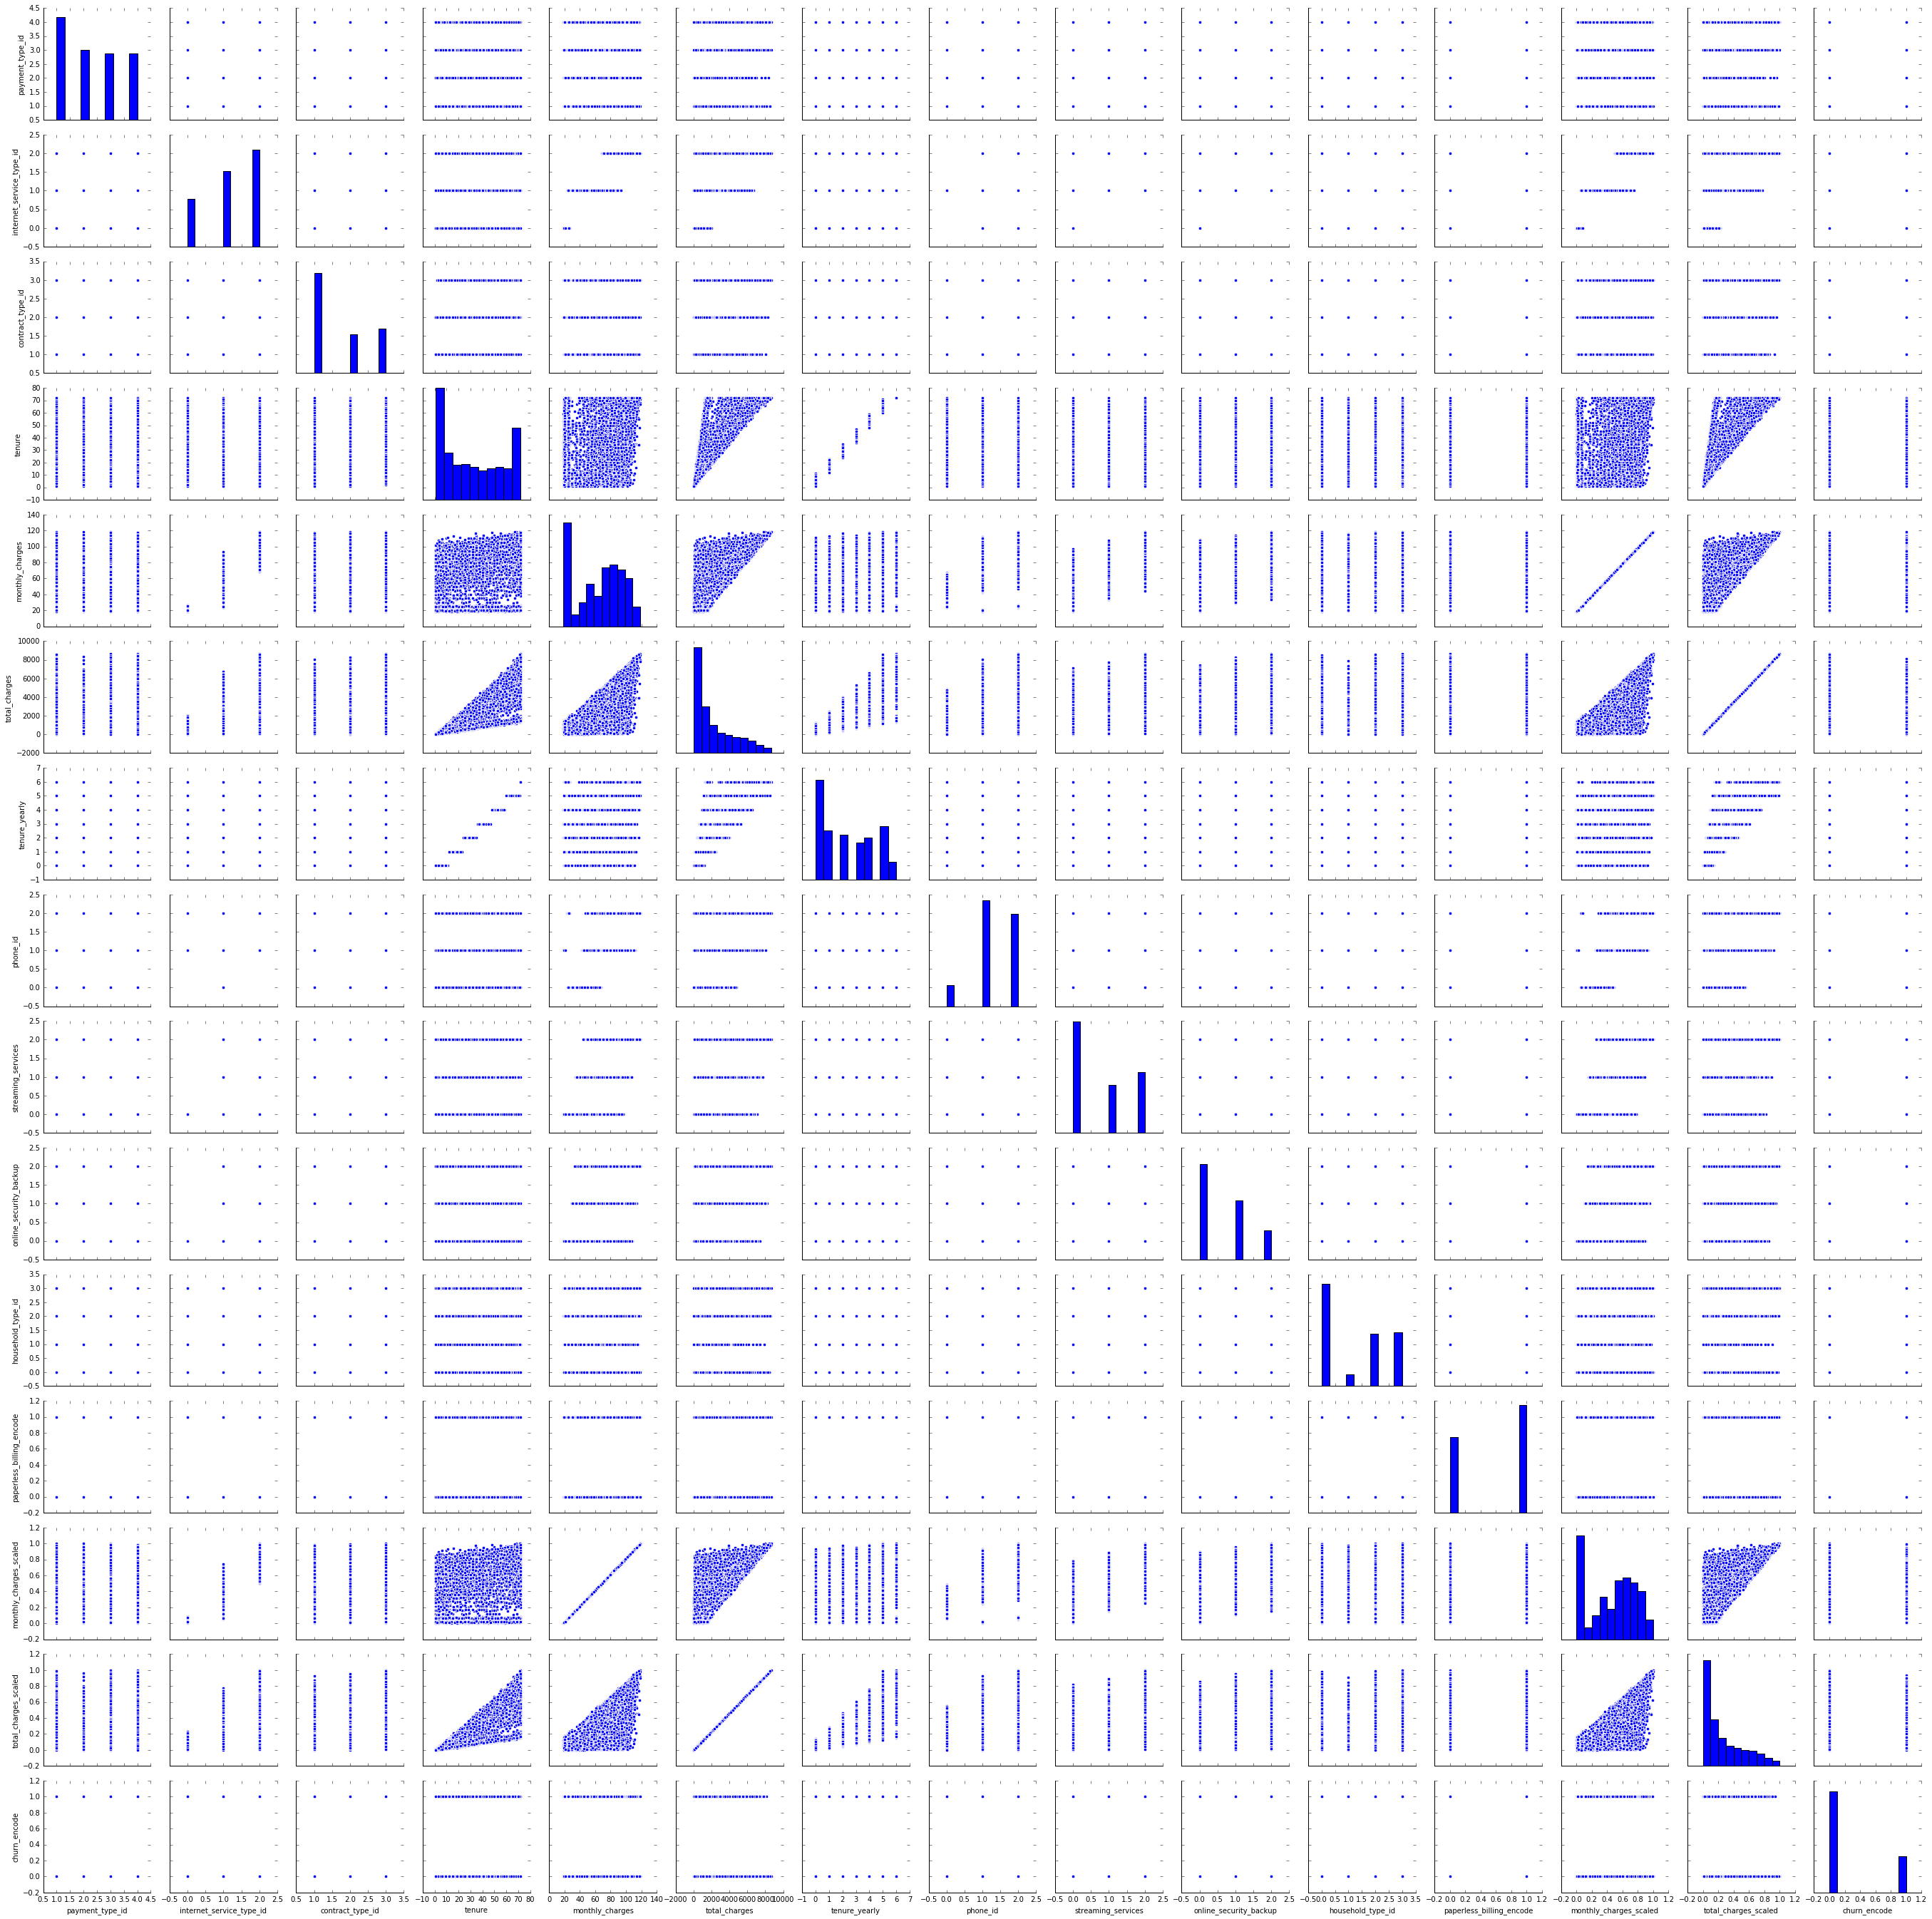

In [27]:
sns.pairplot(train[['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'tenure', 'monthly_charges', 'total_charges', 'tenure_yearly', 'phone_id',
       'streaming_services', 'online_security_backup', 'household_type_id', 'paperless_billing_encode', 'monthly_charges_scaled',
       'total_charges_scaled', 'churn_encode']])

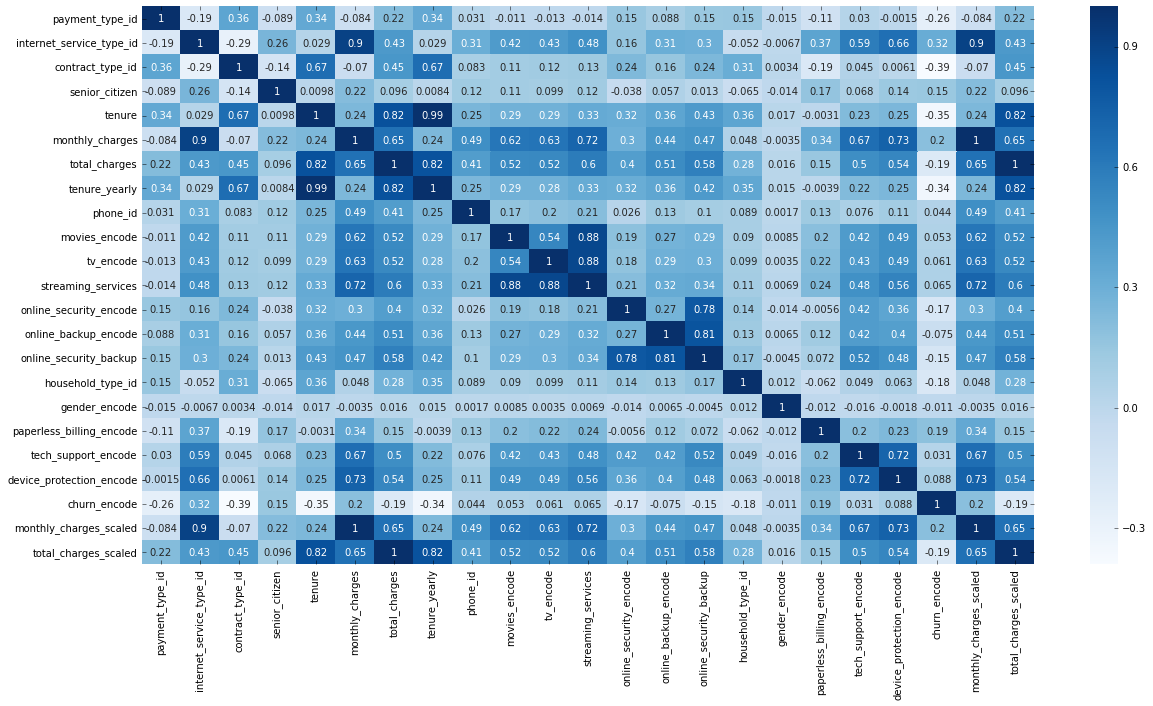

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

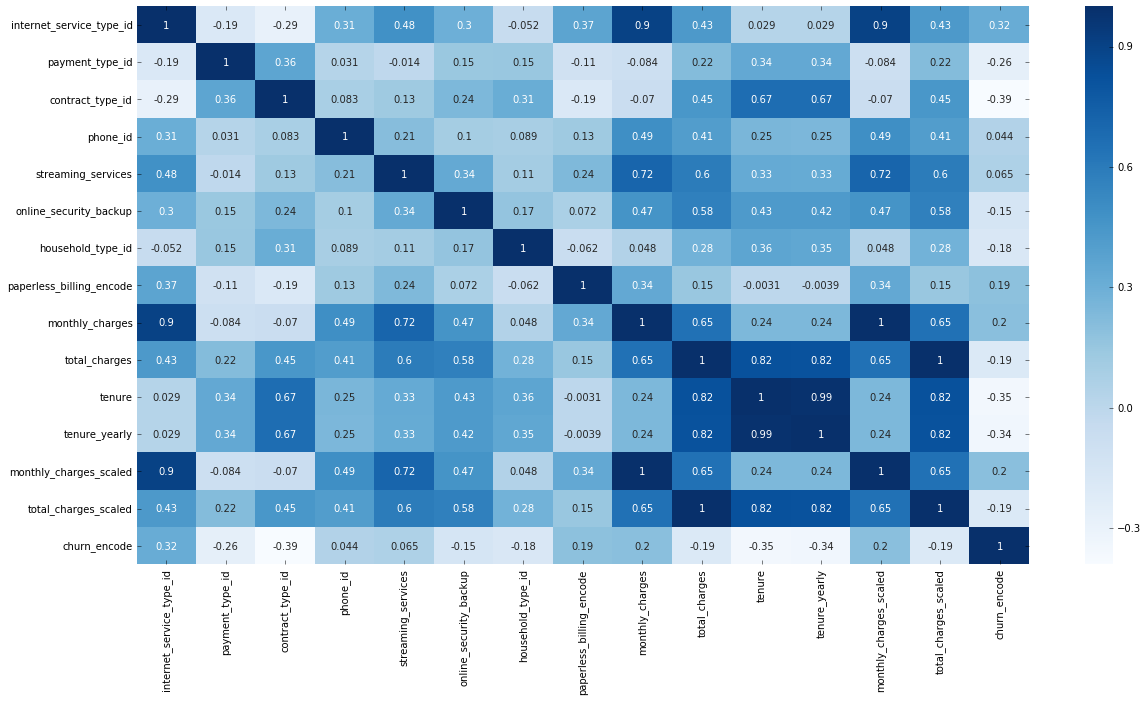

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(train[['internet_service_type_id', 'payment_type_id', 'contract_type_id',
                   'phone_id', 'streaming_services', 'online_security_backup', 'household_type_id',
                   'paperless_billing_encode','monthly_charges', 'total_charges', 'tenure', 'tenure_yearly',
                            'monthly_charges_scaled', 'total_charges_scaled', 'churn_encode']].corr(), 
            cmap='Blues', annot=True)

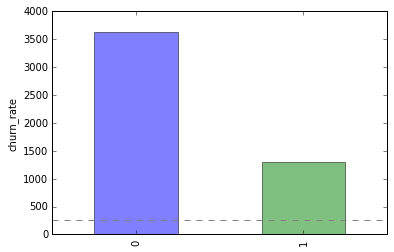

In [30]:
churn_rate = train.churn_encode.mean()*1000

p = train.churn_encode.value_counts().plot(kind="bar", alpha=.5)
p.set_ylabel('churn_rate')
p.axhline(churn_rate, ls='--', color='gray')

In [ ]:
# features = ['internet_service_type_id', 'contract_type_id',
#             'phone_id','monthly_charges', 'total_charges', 'tenure', 'tenure_yearly']

# _, ax = plt.subplots(nrows=1, ncols=10, figsize=(16,5))

# churn_mean = train.churn_encode.mean()

# for i, feature in enumerate(features):
#     sns.barplot(feature, 'churn_encode', data=train, ax=ax[i], alpha=.5)
#     ax[i].set_ylabel('churn_mean')
#     ax[i].axhline(churn_mean, ls='--', color='grey')

In [31]:
#plt.figure(figsize=(10,5))
churn_rate = (train.churn_encode[train['churn_encode'] == 1]).sum() / train.shape[0]
churn_rate

# sns.barplot('tenure', 'churn_encode', data=churn_rate, hue='tenure_yearly')

0.2635107679804957

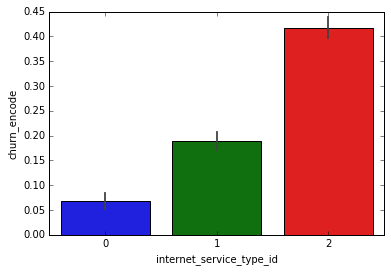

In [77]:
sns.barplot('internet_service_type_id', 'churn_encode', data=train)

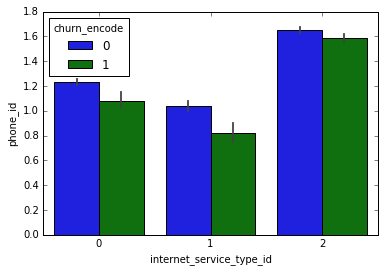

In [82]:
sns.barplot('internet_service_type_id', 'phone_id', data=train, hue='churn_encode')

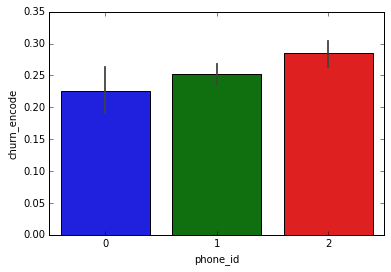

In [72]:
sns.barplot('phone_id', 'churn_encode', data=train)

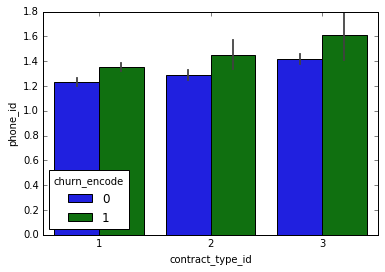

In [86]:
sns.barplot('contract_type_id', 'phone_id', data=train, hue='churn_encode')

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


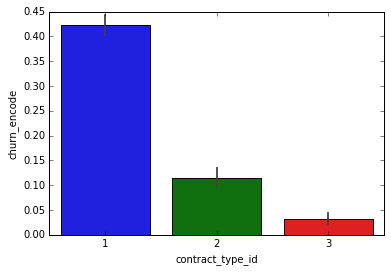

In [79]:
sns.barplot('contract_type_id', 'churn_encode', data=train)

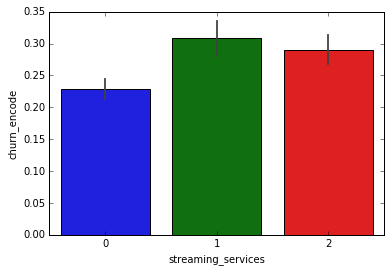

In [80]:
sns.barplot('streaming_services', 'churn_encode', data=train)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


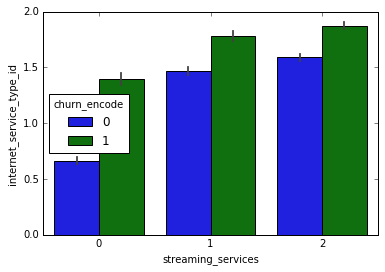

In [87]:
sns.barplot('streaming_services', 'internet_service_type_id', data=train, hue='churn_encode')

## Data Exploration, #3 - price threshold for churn

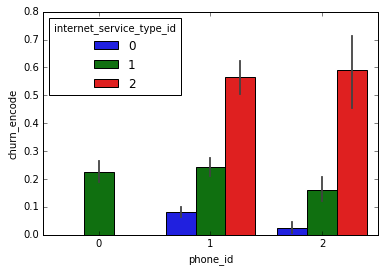

In [32]:
churn_charge_point = train[train['monthly_charges'] <= 75]
sns.barplot('phone_id', 'churn_encode', data=churn_charge_point, hue='internet_service_type_id')

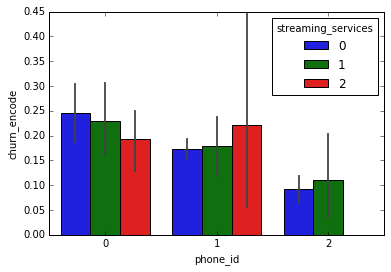

In [67]:
churn_charge_point = train[train['monthly_charges'] <= 70]
sns.barplot('phone_id', 'churn_encode', data=churn_charge_point, hue='streaming_services')

## Data Exploration, #4 - 1yr contracts vs m2m contracts, at 12 month point

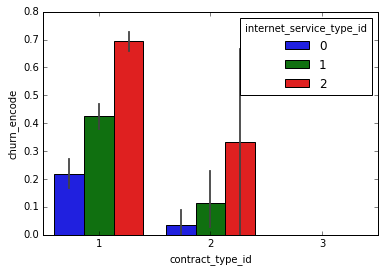

In [36]:
tenure_13 = train[train['tenure'] <= 13]
sns.barplot('contract_type_id', 'churn_encode', data=tenure_13, hue='internet_service_type_id')

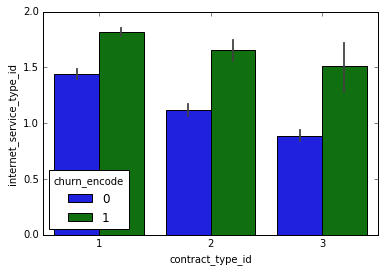

In [37]:
tenure_13 = train[train['tenure'] >= 13]
sns.barplot('contract_type_id', 'internet_service_type_id', data=tenure_13, hue='churn_encode')

In [39]:
pd.crosstab(tenure_13['contract_type_id'], tenure_13.churn_encode, margins=True)
# .style.background_gradient(cmap='YlOrRd')

churn_encode,0,1,All
contract_type_id,,,
1,880,426,1306
2,840,111,951
3,1113,39,1152
All,2833,576,3409


In [38]:
tchgs_bin_df = train.total_charges.value_counts(normalize=True, sort=False, bins=5)
tchgs_bin_df

(10.145000000000001, 1749.53]    0.552215
(1749.53, 3480.26]               0.174523
(3480.26, 5210.99]               0.124137
(5210.99, 6941.72]               0.100569
(6941.72, 8672.45]               0.048557
Name: total_charges, dtype: float64

In [40]:
tenure_gt13 = train[train['tenure'] > 13]
pd.crosstab(tenure_gt13['contract_type_id'], tenure_gt13.churn_encode, margins=True)
# .style.background_gradient(cmap='YlOrRd')

churn_encode,0,1,All
contract_type_id,,,
1,853,400,1253
2,831,111,942
3,1104,39,1143
All,2788,550,3338


In [41]:
train.churn_encode.value_counts()

0    3625
1    1297
Name: churn_encode, dtype: int64

In [42]:
train.churn_encode.value_counts().sum()

4922

In [43]:
1297/4922

0.2635107679804957

In [ ]:
# [[column, pearsonr(train[column], train.churn_encode)] for column in X_train]

# #this generates the column name (x axes), the pearsonr and the p-value for each column (each X axes) in train df,
# # in correlation with the train.final_grade (y axis)

## Logistic Regression fitting

In [57]:
logit = LogisticRegression()
logit.fit(train.drop('churn_encode', axis=1), y_train)
y_pred = logit.predict(train.drop('churn_encode', axis=1))
y_pred_proba = logit.predict_proba(train.drop('churn_encode', axis=1))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
print('Columns: \n:', train.columns)
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Columns: 
: Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'tenure_yearly', 'phone_id', 'movies_encode', 'tv_encode',
       'streaming_services', 'online_security_encode', 'online_backup_encode',
       'online_security_backup', 'household_type_id', 'gender_encode',
       'paperless_billing_encode', 'tech_support_encode',
       'device_protection_encode', 'churn_encode', 'monthly_charges_scaled',
       'total_charges_scaled'],
      dtype='object')
Coefficient: 
 [[-1.45325943e-01  9.77940194e-01 -5.74078230e-01  2.04828101e-01
  -9.09704083e-02 -7.85700727e-03  2.38305329e-04  4.87337357e-01
   1.49010319e-01  6.91783047e-02  1.08481093e-01  1.77659397e-01
  -2.23925488e-01  6.71795117e-02 -1.56745976e-01 -7.15008403e-02
   2.79278018e-03  3.08483367e-01 -2.24406744e-01  1.40059842e-01
   3.36909200e-03  4.12692956e-05]]
Intercept: 
 [-0.0189836]


In [59]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

#### Probability of Stay vs Churn 

In [60]:
y_pred_proba

array([[0.48401807, 0.51598193],
       [0.88038002, 0.11961998],
       [0.95024458, 0.04975542],
       ...,
       [0.9466144 , 0.0533856 ],
       [0.69515117, 0.30484883],
       [0.24850086, 0.75149914]])

#### Accuracy 

In [61]:
(y_train['churn_encode'] == y_pred).sum() / y_train.shape[0]

0.8071921982933766

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train.churn_encode, y_pred)

array([[3274,  351],
       [ 598,  699]])

In [63]:
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Thus in binary classification, the count of true negatives is C 0,0,
# false negatives is 1, 0, true positives is 1, 1 and false positives is 0, 1.

cm = pd.DataFrame(confusion_matrix(train.churn_encode, y_pred),
             columns=['Pred -', 'Pred +'], index=['Actual -', 'Actual +'])

cm

,Pred -,Pred +
Actual -,3274,351
Actual +,598,699


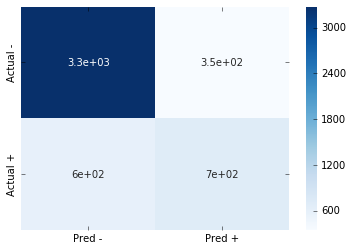

In [64]:
%matplotlib inline
import seaborn as sns

sns.heatmap(cm, cmap='Blues', annot=True)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3625
           1       0.67      0.54      0.60      1297

   micro avg       0.81      0.81      0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922

